### **LIBRARIES**

In [2]:
import yfinance as yf
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **DATA**

In [4]:
# Import historical data from yahoo finance API
# Prices per industry (Tickers)
tickers = [

    # Target of the model
    "SPY", 
    
    # Technology
    "AAPL", "MSFT", "NVDA", "GOOGL", "INTC",
    "CSCO", "TXN", "IBM", "ORCL", "QCOM", "AMZN",
    "TSLA", "META",

    # Financials
    "GS", "BAC", "C", "WFC", "MS", "AXP", "BRK-B", 
    "V", "MA","JPM",

    # Healthcare
    "UNH", "JNJ", "PFE", "LLY", "ABBV", "MRK", 
    "AMGN","MDT", "CI", "CVS",

    # Index(s)
    "^OEX", "NDAQ"
]

# Empty dictionary to keep tickers
data_dict = {}

# Import historical data for each ticker
for ticker in tickers:
    stock_data = yf.Ticker(ticker).history(start = "2009-01-01", end = "2026-01-01", interval = "1d")[['Close']]
    stock_data.index = stock_data.index.tz_localize(None)
    stock_data.index.name = 'Date'
    stock_data.rename(columns = {'Close': ticker}, inplace = True)
    data_dict[ticker] = stock_data

# Individual dataframe for each stock
for ticker in tickers:
    globals()[ticker] = data_dict[ticker]
    globals()[ticker] = globals()[ticker][[ticker]]

# Merge dataframes 
SPY_combined = SPY.copy()
for ticker in tickers:
    if ticker != "SPY":  
        SPY_combined = SPY_combined.join(globals()[ticker], how = "inner") 
        
# Adjust dataset
df = SPY_combined
df.rename(columns = {'SPY': 'TARGET'}, inplace = True)
df = df.dropna()
model_df = df.copy()

In [5]:
model_df

,TARGET,AAPL,MSFT,NVDA,GOOGL,INTC,CSCO,TXN,IBM,ORCL,...,PFE,LLY,ABBV,MRK,AMGN,MDT,CI,CVS,^OEX,NDAQ
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,117.978645,16.687342,22.406956,0.293515,18.033974,15.289289,13.999763,23.340633,116.799042,29.055420,...,15.493465,38.176552,21.427122,27.198639,64.564934,31.867792,51.359097,36.775696,663.869995,7.061658
2013-01-03,117.712128,16.476709,22.106798,0.293745,18.044449,15.246388,14.075470,23.037230,116.156601,28.737137,...,15.457587,38.338486,21.250189,27.849968,64.159348,32.316757,50.604908,36.849728,662.330017,7.231619
2013-01-04,118.229080,16.017756,21.693048,0.303437,18.401012,15.131971,14.096122,22.986662,115.395241,28.988403,...,15.523362,39.757290,20.981735,27.613129,64.441780,32.461315,50.977337,37.005180,664.690002,7.259033
2013-01-07,117.905968,15.923533,21.652491,0.294668,18.320723,15.196329,13.965349,23.058903,114.889565,28.837660,...,15.535324,39.703312,21.024443,27.711813,64.115883,32.841785,51.154251,37.034798,663.090027,7.201464
2013-01-08,117.566681,15.966384,21.538912,0.288207,18.284567,15.081911,13.979111,22.791611,114.728989,28.846031,...,15.559248,40.004032,20.566858,27.751291,63.840687,32.803726,50.670086,36.901524,661.140015,7.154862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10,580.489990,236.850006,418.950012,135.910004,192.039993,19.150000,58.740002,190.149994,219.750000,154.500000,...,26.719999,799.900024,173.533554,99.250000,262.230011,80.660004,278.989990,48.009998,2857.979980,75.879997
2025-01-13,581.390015,234.399994,417.190002,133.229996,191.009995,19.200001,58.759998,191.089996,217.399994,153.919998,...,26.799999,797.479980,175.088882,100.980003,270.190002,81.790001,282.450012,51.520000,2858.429932,76.180000
2025-01-14,582.190002,233.279999,415.670013,131.759995,189.660004,19.200001,59.330002,193.500000,217.750000,156.309998,...,26.410000,744.909973,173.910004,99.650002,267.100006,85.250000,285.029999,51.570000,2851.780029,76.250000


### **DATA ANALYSIS**

In [7]:
# Correlation between S&P and other variables
correlation_with_sp = df.corr()['TARGET']
corr = pd.DataFrame(correlation_with_sp)
corr

,TARGET
TARGET,1.000000
AAPL,0.979154
MSFT,0.987880
NVDA,0.828586
GOOGL,0.987647
INTC,0.404465
CSCO,0.911876
TXN,0.972483
IBM,0.699458
ORCL,0.945070


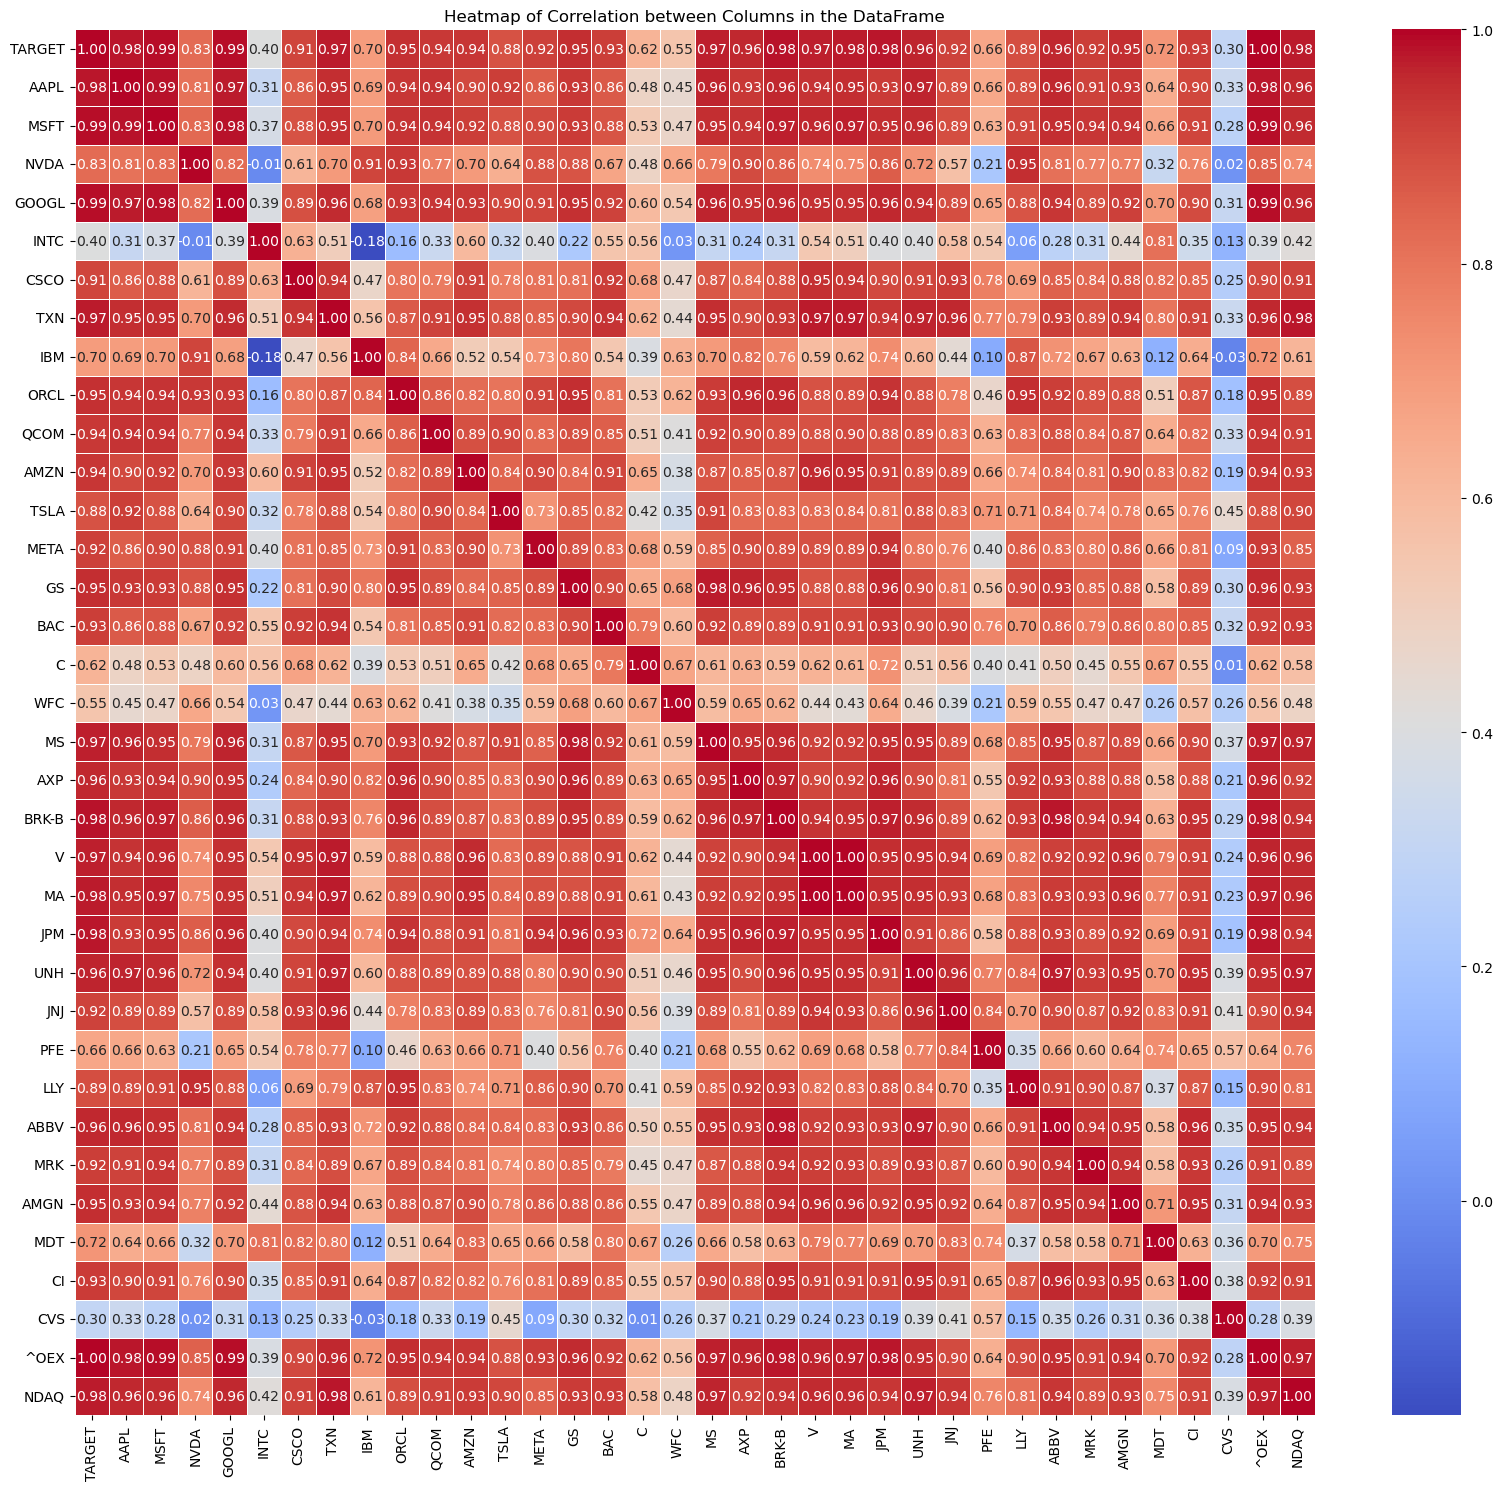

In [8]:
# Correlation matrix 
corr_matrix = df.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(20, 18)) 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Heatmap of Correlation between Columns in the DataFrame')
plt.show()

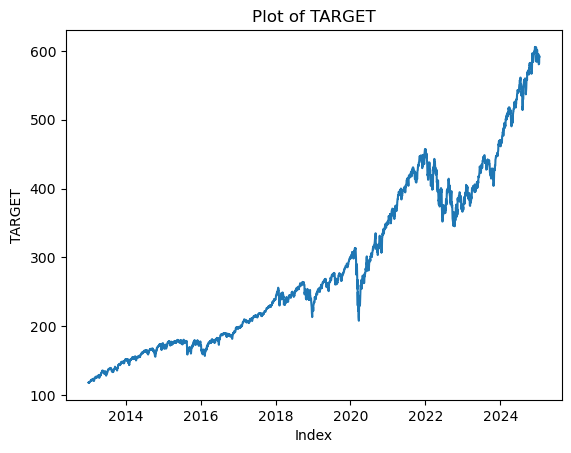

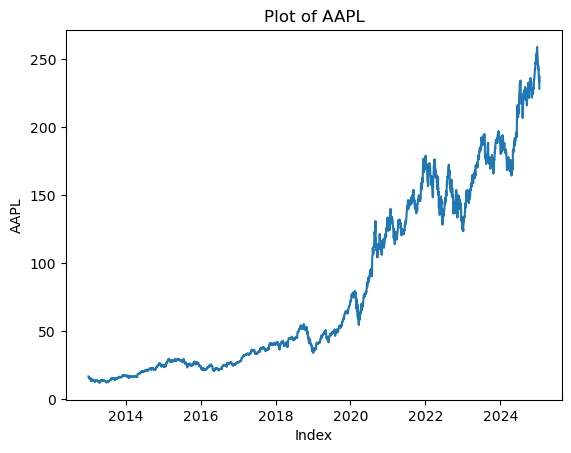

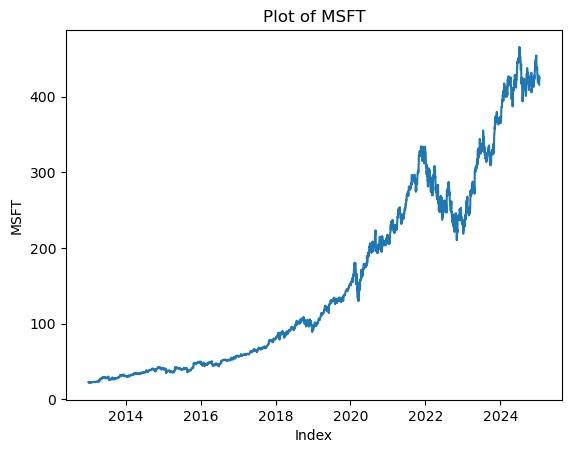

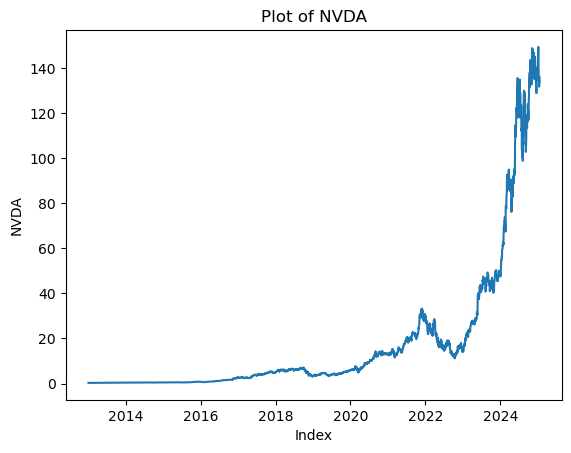

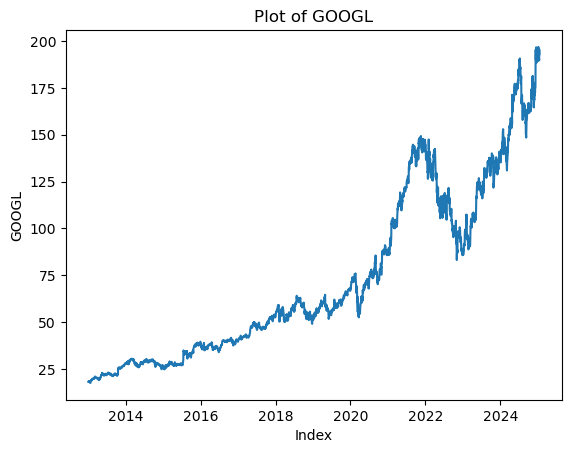

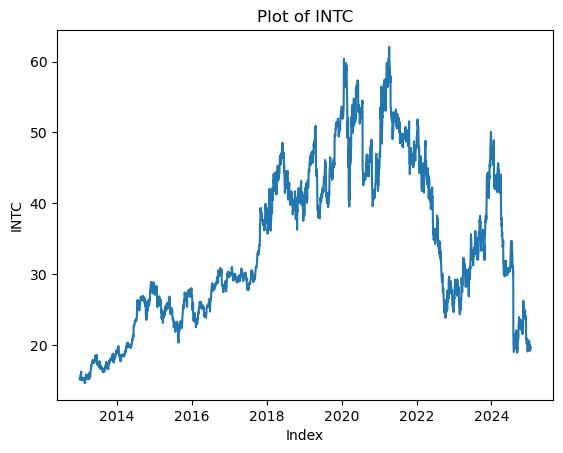

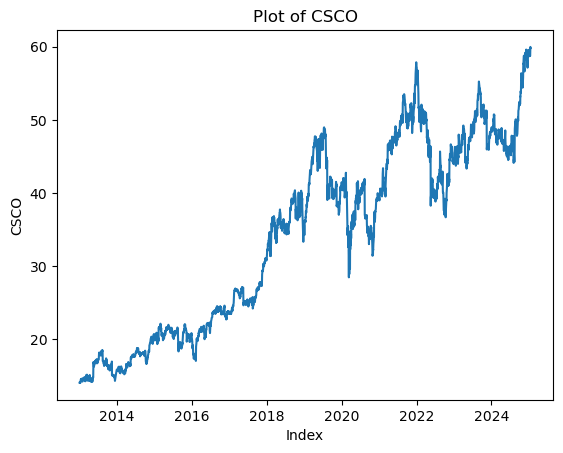

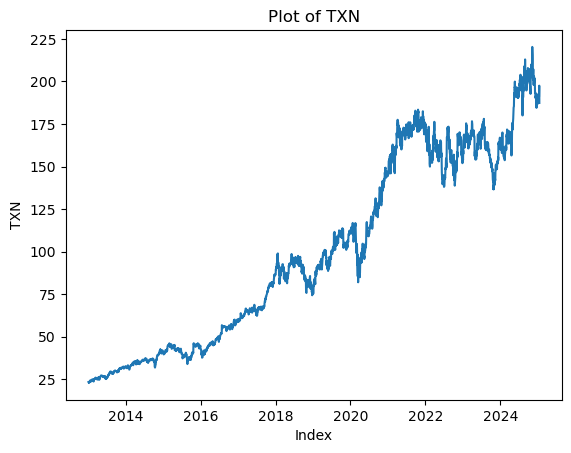

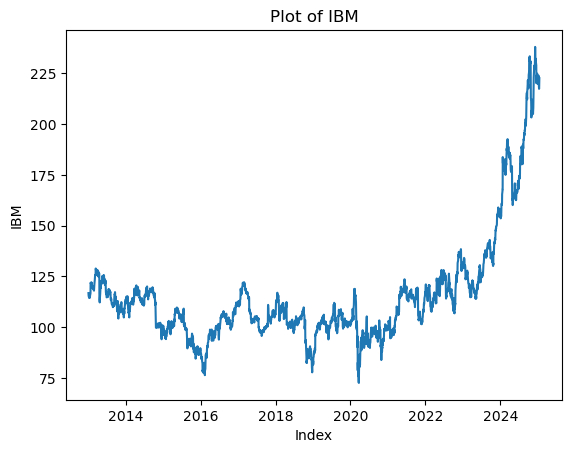

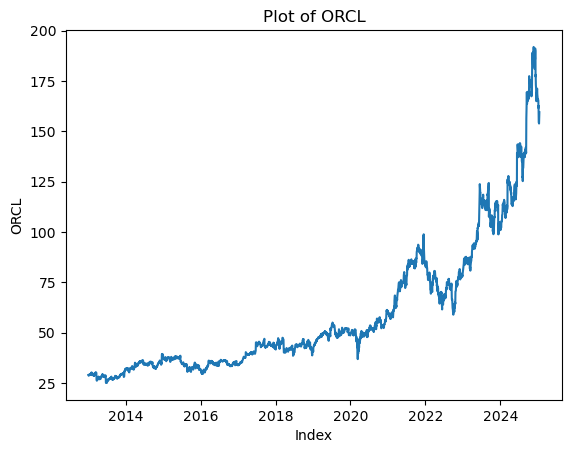

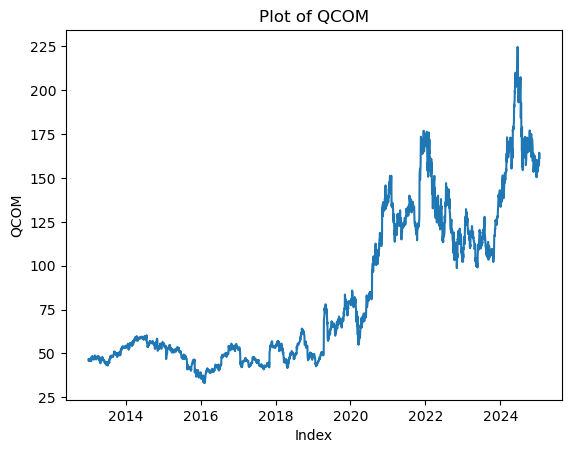

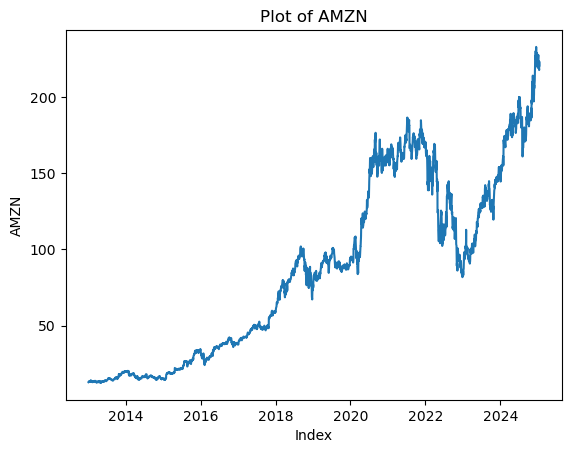

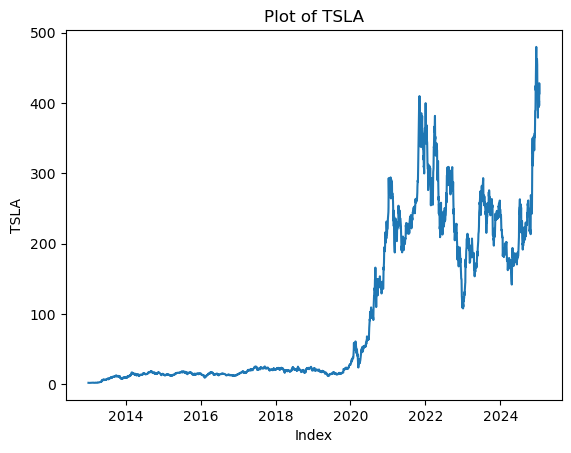

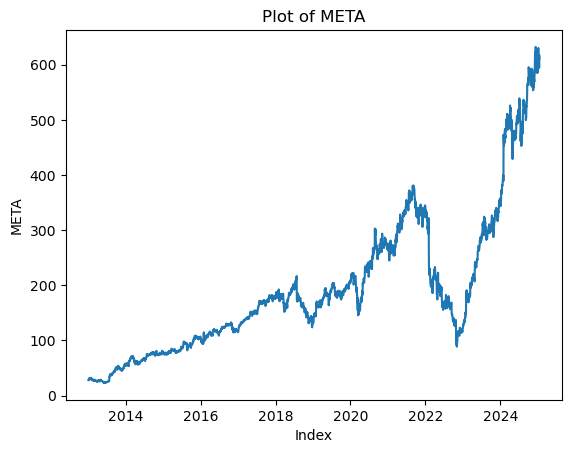

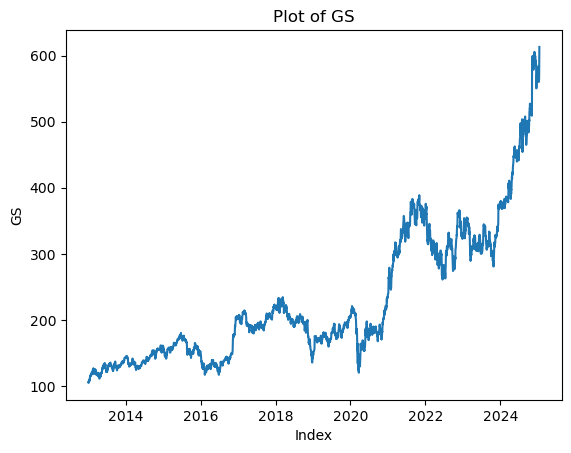

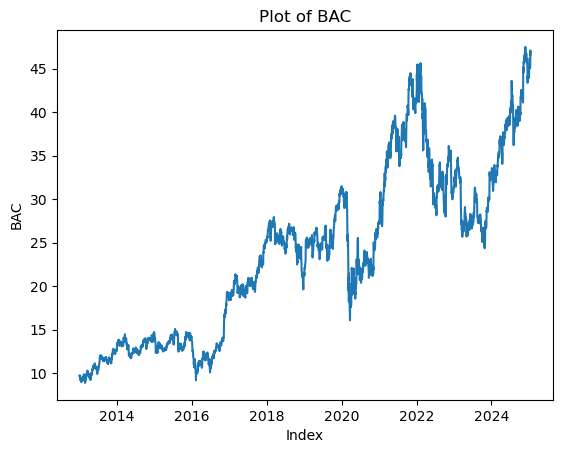

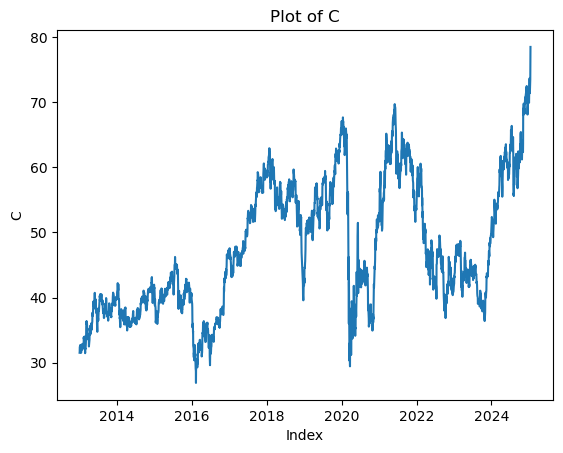

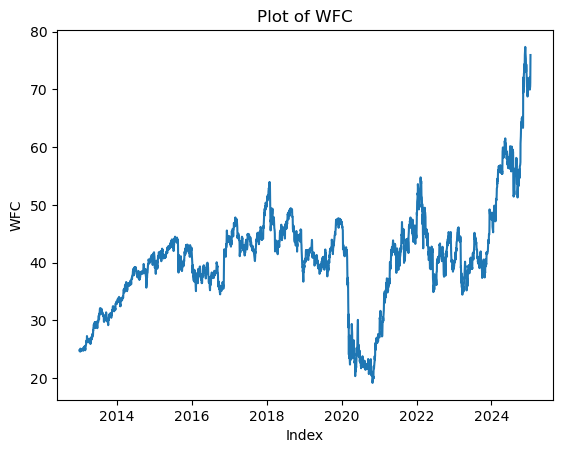

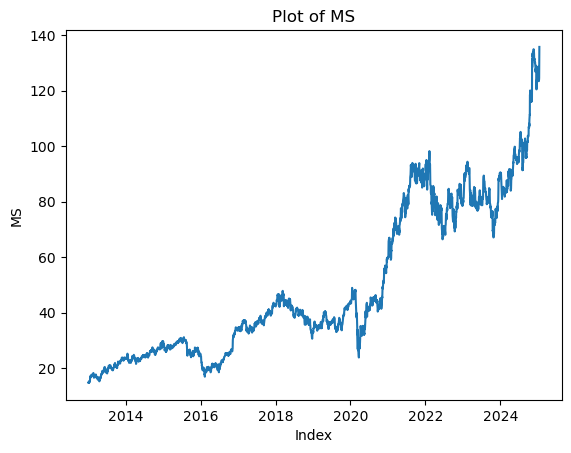

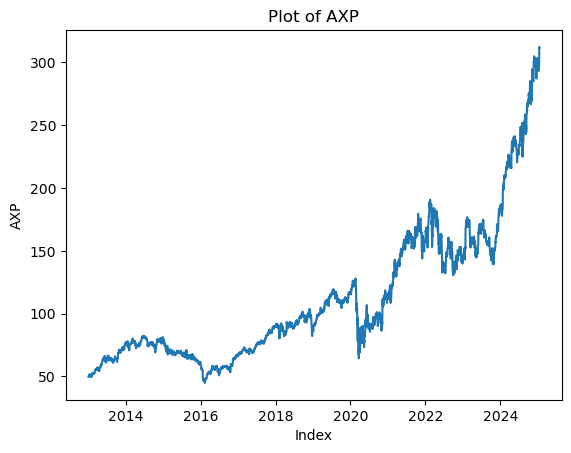

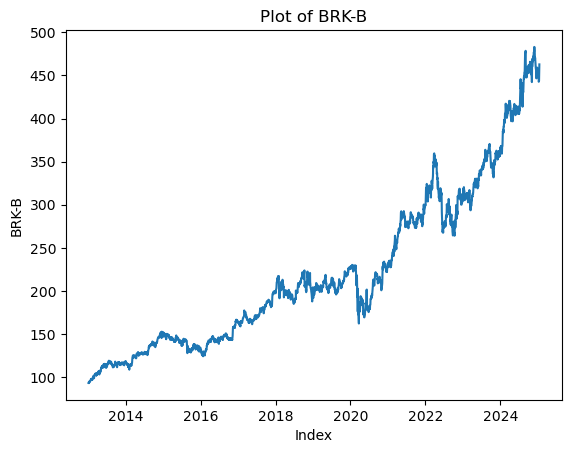

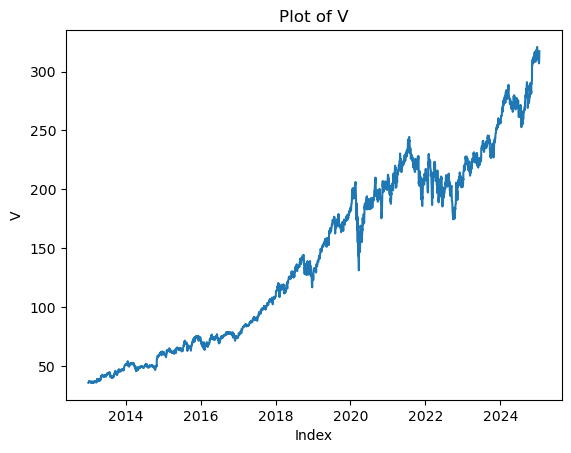

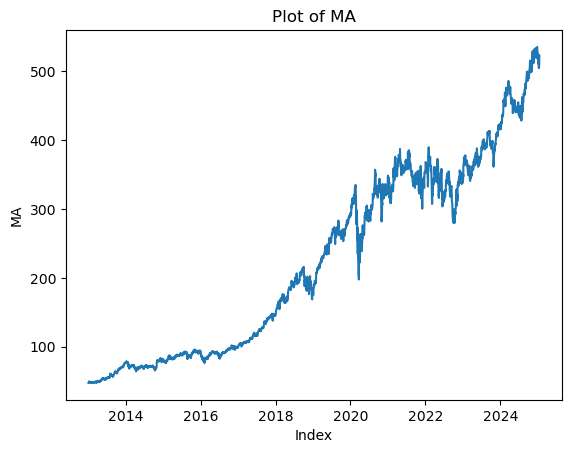

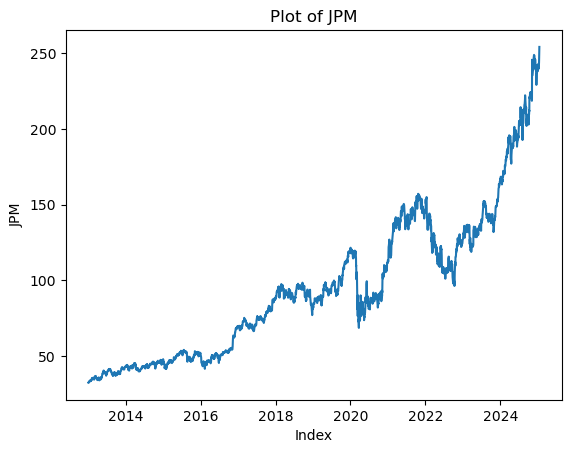

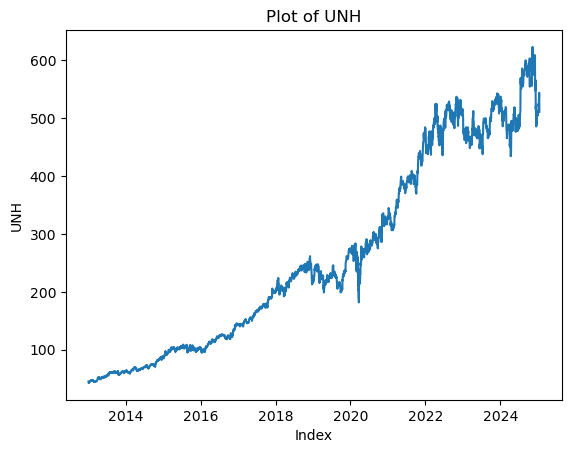

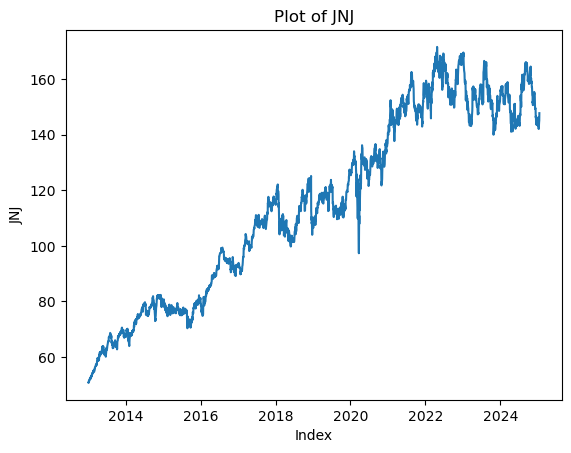

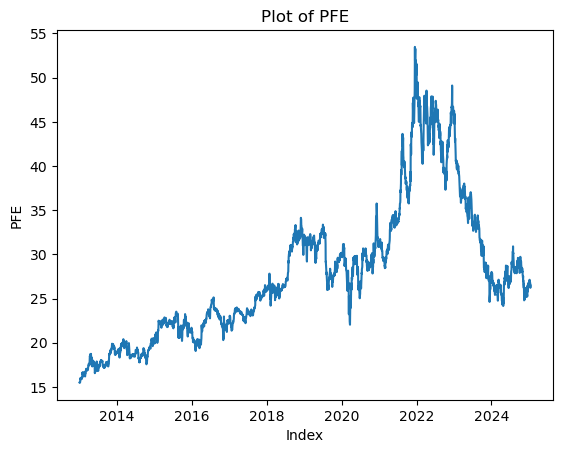

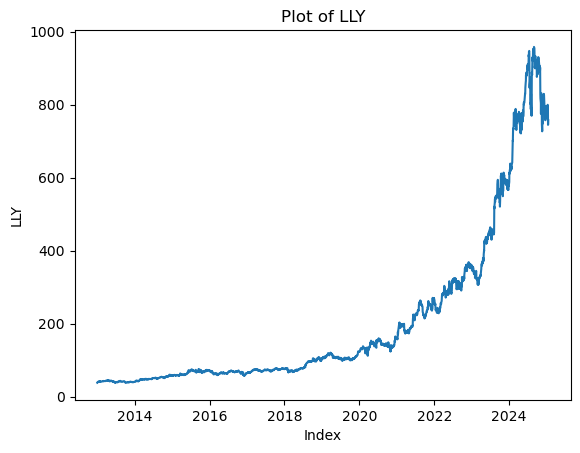

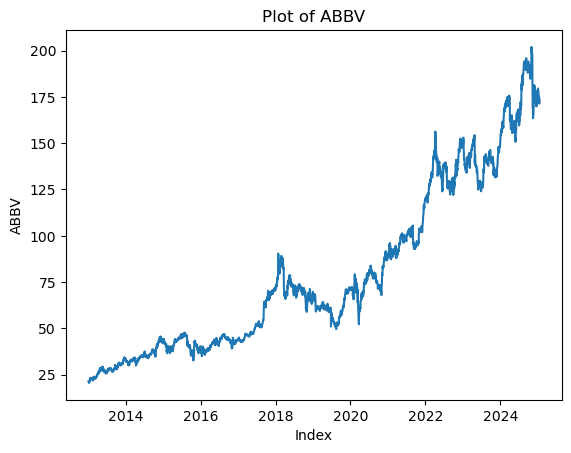

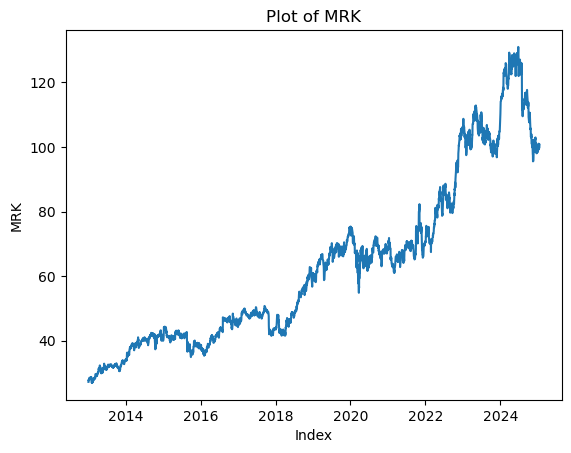

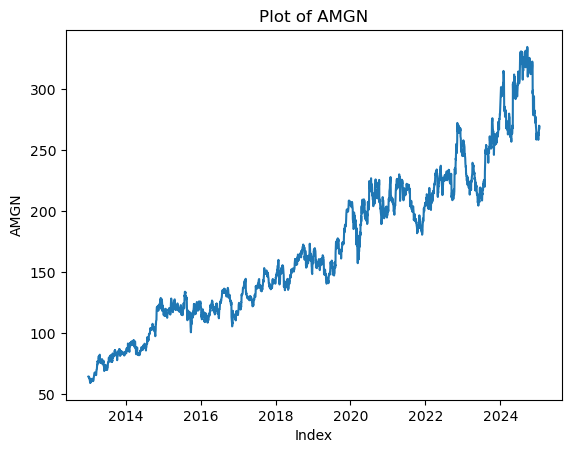

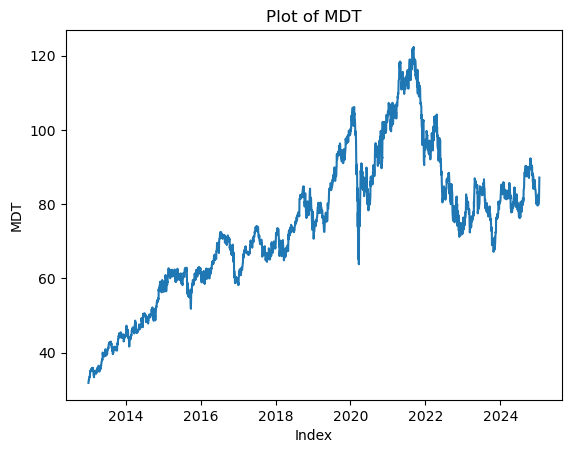

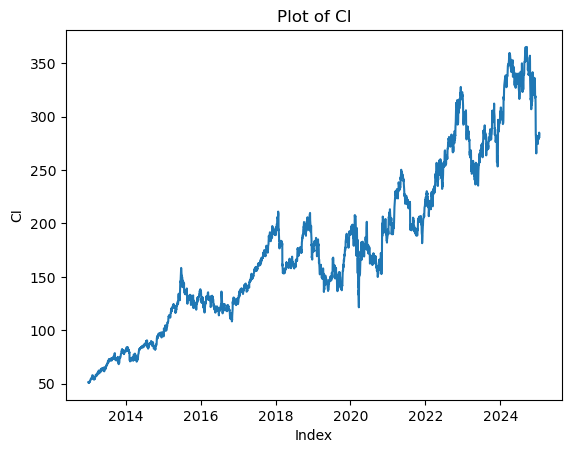

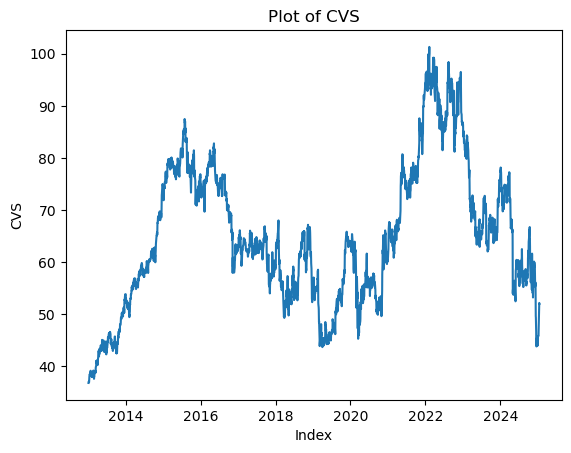

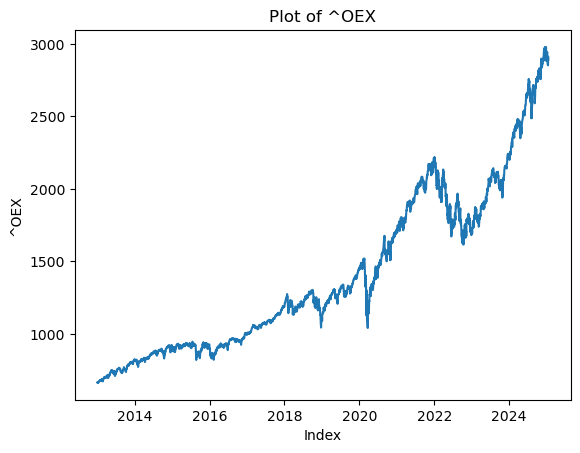

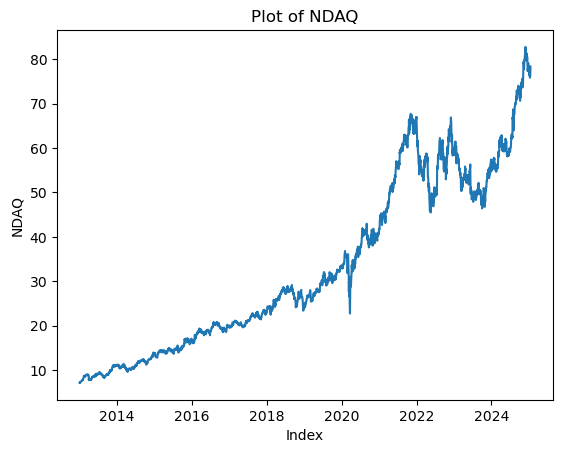

In [9]:
# Prices over-time
for column in df.columns:
    plt.figure()  
    plt.plot(df[column])
    plt.xlabel('Index')  
    plt.ylabel(column)   
    plt.title(f'Plot of {column}')  
    plt.show()  

### **WEIGHTED INDUSTRIES**

In [11]:
# Change dprices into arithmetic returns
df = df.pct_change()
df = df.dropna()
df = df*100

# Define industries
industries = {
    "tech": ["AAPL", "MSFT", "NVDA", "GOOGL", "INTC", "CSCO", "TXN", "IBM", "ORCL", "QCOM", "AMZN", "TSLA", "META"],
    "fin": ["GS", "BAC", "C", "WFC", "MS", "AXP", "BRK-B", "V", "MA", "JPM"],
    "health": ["UNH", "JNJ", "PFE", "LLY", "ABBV", "MRK", "AMGN", "MDT", "CI", "CVS"]
}

# Function to calculate rolling beta for multiple stocks
def calculate_rolling_beta(industry_tickers, df):
    industry_data = {"Date": df.index}
    for ticker in industry_tickers:
        stock_corr = df[[ticker, "TARGET"]].dropna()
        n_records = len(stock_corr)
        betas = []

        # Calculate rolling beta
        for i in range(n_records - 100 + 1):
            X = stock_corr.iloc[i:i+100][ticker]
            Y = stock_corr.iloc[i:i+100]["TARGET"]
            cov_XY = X.cov(Y)
            var_X = X.var()
            beta = cov_XY / var_X
            betas.append(beta)

        # Create DataFrame with rolling betas
        beta_series = pd.Series([np.nan] * 99 + betas, index=stock_corr.index, name=f"{ticker}_BETA")
        industry_data[ticker] = stock_corr[ticker]
        industry_data[f"{ticker}_BETA"] = beta_series

    return pd.DataFrame(industry_data).set_index("Date")

# Calculate rolling betas for each industry
# Technology betas
BETA_tech = calculate_rolling_beta(industries["tech"], df)
BETA_tech = BETA_tech.filter(like='BETA', axis=1)  
BETA_tech = BETA_tech.dropna()

# Financials betas
BETA_fin = calculate_rolling_beta(industries["fin"], df)
BETA_fin = BETA_fin.filter(like='BETA', axis=1)  
BETA_fin = BETA_fin.dropna()

# Healthcare betas
BETA_health = calculate_rolling_beta(industries["health"], df)
BETA_health = BETA_health.filter(like='BETA', axis=1)  
BETA_health = BETA_health.dropna()

In [12]:
BETA_tech.to_csv('TECH_NEW.csv')